In [1]:
import happi
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement

In [2]:
S = happi.Open("run/")

No valid paths to Smilei simulation results have been provided


In [3]:
data = S.ParticleBinning(0).getData()
x_axis = S.ParticleBinning(0).getAxis('x')
y_axis = S.ParticleBinning(0).getAxis('y')
z_axis = S.ParticleBinning(0).getAxis('z')

In [4]:
z_axis

array([4.125, 4.375, 4.625, 4.875, 5.125, 5.375, 5.625, 5.875])

In [5]:
# create a flat array of the data with [x,y,z,data]
to_arr = []
da = data[0]
r,g,b = 255, 0, 0
for da in data:
    to_pcd = []
    for j in range(da.shape[0]):
        for k in range(da.shape[1]):
            for l in range(da.shape[2]):
                to_pcd.append([x_axis[j], y_axis[k], z_axis[l], r, g, b, da[j,k,l]])
    #renormalize the last component so that all non zero value are between 0.8 and 1.0
    to_pcd = np.array(to_pcd)
    non_zero_min = np.min(to_pcd[:,6][to_pcd[:,6] != 0])
    max_op = np.max(to_pcd[:,6])
    if max_op - non_zero_min < 0.0001:
        to_pcd[:,6][to_pcd[:,6] != 0] = 1
    else:
        to_pcd[:,6] = ((to_pcd[:,6] - non_zero_min) / (np.max(to_pcd[:,6]) - non_zero_min) * 0.2 + 0.8) * (to_pcd[:,6] != 0)
    
    to_pcd[:,3] = to_pcd[:,3].astype('u1')
    to_pcd[:,4] = to_pcd[:,4].astype('u1')
    to_pcd[:,5] = to_pcd[:,5].astype('u1')
    to_pcd[:,6] = (to_pcd[:,6]*255).astype('u1')
    
    to_arr.append(to_pcd)

to_arr = np.array(to_arr)

In [6]:
mask = (np.max(to_arr, axis=0)[:, 6] == 0)
to_arr = to_arr[:, ~mask, :]

In [7]:
np.save('to_anim.npy',to_arr)

In [8]:
to_pcd = to_arr[0]

points_to_ply = np.zeros(to_pcd.shape[0], dtype=[('x', 'f4'), ('y', 'f4'),('z', 'f4'),('red', 'u1'), ('green', 'u1'),('blue', 'u1'),('alpha', 'u1')])
points_to_ply['x'] = to_pcd[:,0]
points_to_ply['y'] = to_pcd[:,1]
points_to_ply['z'] = to_pcd[:,2]
points_to_ply['red'] = to_pcd[:,3]
points_to_ply['green'] = to_pcd[:,4]
points_to_ply['blue'] = to_pcd[:,5]
points_to_ply['alpha'] = to_pcd[:,6]


el = PlyElement.describe(points_to_ply, 'vertex')
PlyData([el], text=True).write('tokamamamam.ply')

In [9]:
points_to_ply[0]

(2.6953125, 14.6484375, 5.125, 255, 0, 0, 0)

In [10]:
radius_over_time = []

for idx, da in enumerate(data):
    avg_radius = 0
    cnt = 0
    for j in range(da.shape[0]):
        for k in range(da.shape[1]):
            if np.mean(da[j][k]) > 0.01:
                avg_radius += (np.sqrt((x_axis[j]-15)**2 + (y_axis[k]-15)**2))*np.mean(da[j][k])
                cnt += 1
    radius_over_time.append(avg_radius/cnt)

In [27]:
np.save('radius.npy',np.array(radius_over_time))

Calculate the average radius over time

In [11]:
percentage_over_time = []
start_r_avg = radius_over_time[0]
for da in radius_over_time:
    percentage_over_time.append((da - start_r_avg)/start_r_avg)

In [31]:
arr = np.array(percentage_over_time)

In [39]:
np.std(arr[:2])

0.0005333396649180456

In [29]:
np.save('time.npy',S.ParticleBinning(0).getTimes())

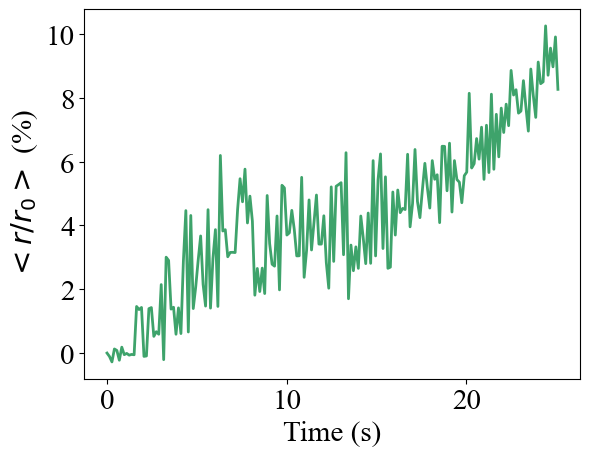

In [30]:
plt.plot(S.ParticleBinning(0).getTimes(), np.array(percentage_over_time)*100, color=[62/255, 163/255, 107/255], linewidth=2, )
fsize = 21
# plt.title('Change of average radius of the plasma over time', weight='bold', fontsize=fsize)
plt.xlabel('Time (s)', fontsize=fsize)
plt.ylabel('$<r/r_0>$ (%)', fontsize=fsize)
plt.tick_params(axis='both', which='major', labelsize=fsize)


In [13]:
data[0].shape

(128, 128, 8)